# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [4]:
!pip install pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [5]:
df = pd.read_csv('../dataset_raw/data.csv')
df.head()

,age,gender,study_hours,attendance,previous_grade,internet_access,final_score
0,21,Female,4.69,64.06,73.23,Yes,50.57
1,18,Female,7.80,86.54,64.53,No,73.43
2,19,Male,3.06,60.20,85.78,No,52.82
3,21,Female,1.69,66.43,62.19,Yes,55.94
4,17,Male,3.61,81.95,69.75,Yes,55.88


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [11]:
df.shape
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              100 non-null    float64
 1   gender           100 non-null    float64
 2   study_hours      100 non-null    float64
 3   attendance       100 non-null    float64
 4   previous_grade   100 non-null    float64
 5   internet_access  100 non-null    float64
 6   final_score      100 non-null    float64
dtypes: float64(7)
memory usage: 5.6 KB


In [12]:
df.describe()

,age,gender,study_hours,attendance,previous_grade,internet_access,final_score
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-4.485301e-16,5.107026e-17,-8.459899e-16,-9.225953e-16,2.331468e-16,4.662937e-17,-4.241052e-16
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.685765e+00,-1.224745e+00,-1.704541e+00,-1.884748e+00,-1.624643e+00,-1.151339e+00,-1.820970e+00
25%,-7.667344e-01,-1.224745e+00,-8.859435e-01,-7.711920e-01,-8.246807e-01,-1.151339e+00,-7.341475e-01
50%,-1.102837e-01,8.164966e-01,3.096351e-03,6.772609e-02,1.799111e-02,8.685540e-01,5.885025e-02
75%,9.400374e-01,8.164966e-01,9.089726e-01,7.284025e-01,8.799391e-01,8.685540e-01,9.329370e-01
max,1.465198e+00,8.164966e-01,1.658870e+00,1.698274e+00,1.695397e+00,8.685540e-01,1.423903e+00


In [18]:
df.columns

Index(['age', 'gender', 'study_hours', 'attendance', 'previous_grade',
       'internet_access', 'final_score'],
      dtype='str')

In [13]:
df.isnull().sum()

age                0
gender             0
study_hours        0
attendance         0
previous_grade     0
internet_access    0
final_score        0
dtype: int64

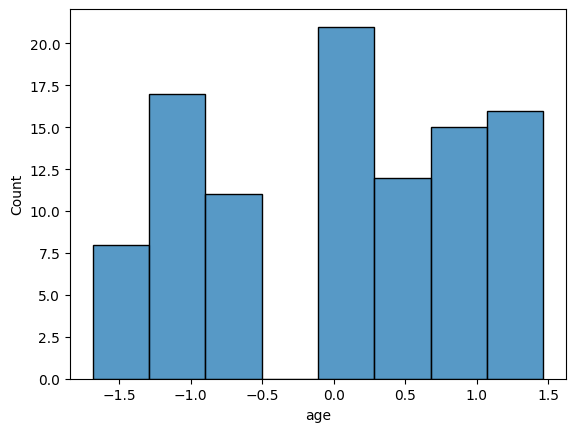

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['age'])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [15]:
df.fillna(df.mean(), inplace=True)

,age,gender,study_hours,attendance,previous_grade,internet_access,final_score
0,1.465198,-1.224745,-0.299572,-1.533721,0.082245,0.868554,-1.820970
1,-0.110284,-1.224745,0.904135,0.510602,-0.575413,-1.151339,-0.320003
2,0.414877,0.816497,-0.930454,-1.884748,1.030936,-1.151339,-1.673237
3,1.465198,-1.224745,-1.460704,-1.318194,-0.752301,0.868554,-1.468380
4,-0.635444,0.816497,-0.717579,0.093189,-0.180818,0.868554,-1.472320
...,...,...,...,...,...,...,...
95,0.940037,-1.224745,-1.433611,0.029531,1.396050,0.868554,0.939339
96,-0.110284,-1.224745,-1.166550,0.064089,0.045205,0.868554,-0.046204
97,0.940037,0.816497,1.403421,0.416025,1.137522,-1.151339,-0.016658
98,1.465198,0.816497,0.385496,0.737951,-0.585240,0.868554,1.019443


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = df.select_dtypes(include='number').columns

df[num_cols] = scaler.fit_transform(df[num_cols])

In [20]:
df.to_csv(
    'dataset_preprocessing/data_clean.csv',
    index=False
)